<a href="https://colab.research.google.com/github/workszop/notebooks/blob/main/diffusers_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -qqq install diffusers
!pip -qqq install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.6 MB/s eta 0:00:00


In [ ]:
from PIL import Image

In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, EulerDiscreteScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file

base = "stabilityai/stable-diffusion-xl-base-1.0"
repo = "ByteDance/SDXL-Lightning"
ckpt = "sdxl_lightning_2step_unet.safetensors" # Use the correct ckpt for your step setting!

# Load model.
unet = UNet2DConditionModel.from_config(base, subfolder="unet").to("cuda", torch.float16)
unet.load_state_dict(load_file(hf_hub_download(repo, ckpt), device="cuda"))
pipe = StableDiffusionXLPipeline.from_pretrained(base, unet=unet, torch_dtype=torch.float16, variant="fp16").to("cuda")

# Ensure sampler uses "trailing" timesteps.
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

  0%|          | 0/2 [00:00<?, ?it/s]

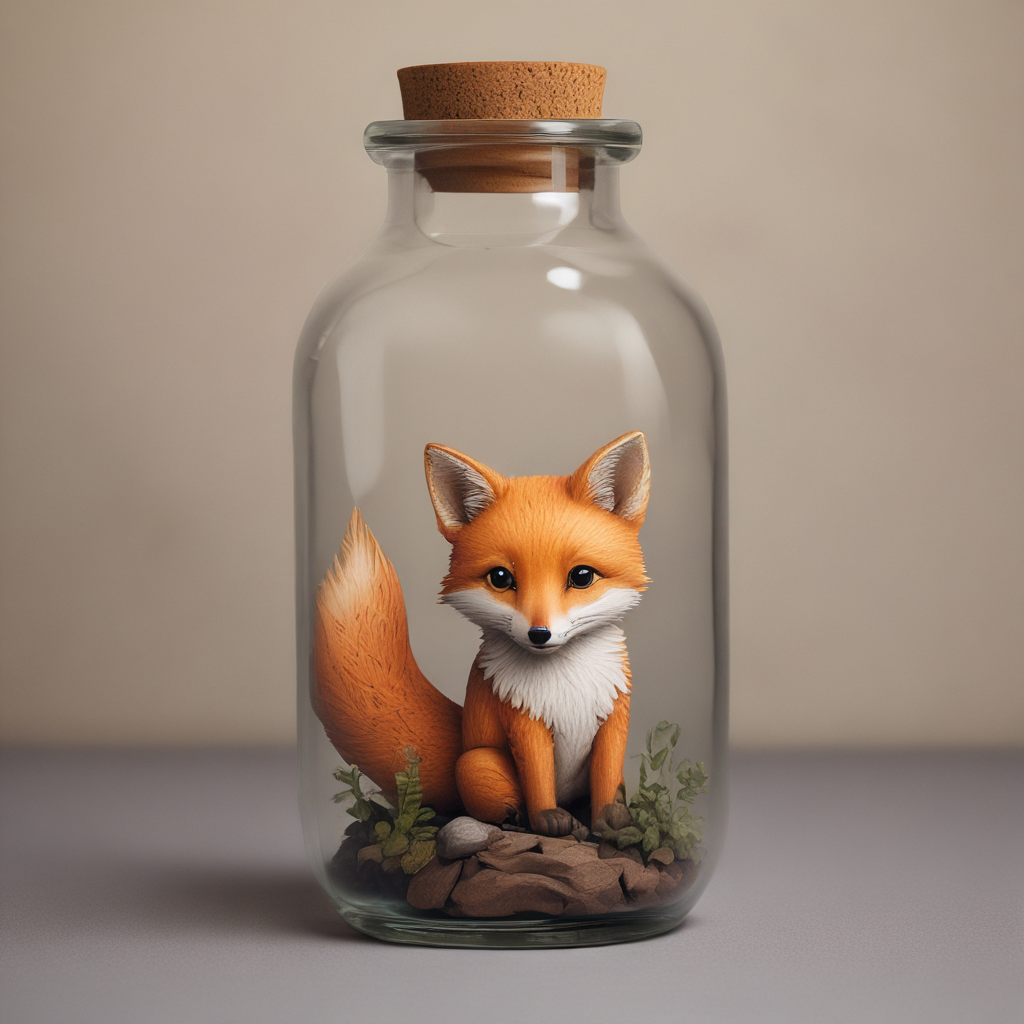

In [ ]:
# Ensure using the same inference steps as the loaded model and CFG set to 0.
pipe("A little fox in a bottle", num_inference_steps=2, guidance_scale=0).images[0].save("output.png")
img = Image.open('output.png')
img